### Neural Networks in keras

<p>
    Keras is built upon tensorflow API's. Keras provides easy to use API's which abtracts major part of model building in tensorflow, thus provide fast prototyping.
<p>
    Unlike in tensorflow, where you have to provide input dimension as well as output dimensions and perform dot product of weight and input data, keras handles all this and provide you nice wrapper around it. So, let's dive in to build our first keras model.

#### Sequential Model


In [143]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten,Dropout
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Load traffic sign small data set

training_file = "./dataset/traffic/small_traffic_set/small_train_traffic.p"
test_file = "./dataset/traffic/small_traffic_set/small_test_traffic.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(test_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [73]:
X_train = (X_train - np.mean(X_train))/np.std(X_train)

In [109]:
X_test = (X_test - np.mean(X_test))/np.std(X_test)

In [74]:
num_examples, h, w, c = X_train.shape
n_classes  = len(np.unique(y_train))
print("num of train examples: {}".format(num_examples))
print("input image shape: {}".format((h,w,c)))
print("classes: {}".format(n_classes))

print(y_train)

h, w, c = X_test[0].shape
print("num of test examples: {}".format(len(X_test)))
print("input image shape: {}".format((h,w,c)))

num of train examples: 100
input image shape: (32, 32, 3)
classes: 5
[2 2 3 2 4 3 3 3 1 4 2 4 2 5 1 4 5 1 1 1 4 2 1 4 5 3 4 1 3 4 4 5 5 1 4 5 2
 5 1 5 3 5 2 2 1 3 5 5 4 2 5 4 3 3 2 5 3 2 3 3 1 5 5 2 1 2 2 2 4 1 5 4 4 5
 5 3 1 3 4 3 4 4 5 2 4 1 3 5 4 4 2 5 1 1 2 3 1 3 1 4]
num of test examples: 20
input image shape: (32, 32, 3)


In [75]:
from sklearn import preprocessing

In [76]:
lb = preprocessing.LabelBinarizer()
lb.fit(y_train)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [77]:
lb.classes_

array([1, 2, 3, 4, 5], dtype=uint8)

In [210]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [169]:
#y_train_cat = to_categorical(y_train)
print(y_train_cat)

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0.

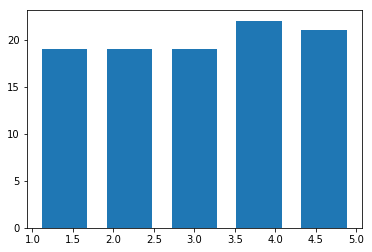

In [170]:
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

In [171]:
def keras_model():
    # create the Sequential model
    model = Sequential()

    #1st Layer - Add a flatten layer
    model.add(Flatten(input_shape=(32, 32, 3)))

    #2nd Layer - Add a fully connected layer
    model.add(Dense(100))

    #3rd Layer - Add a ReLU activation layer
    model.add(Activation('relu'))

    #4th Layer - Add a fully connected layer
    model.add(Dense(5))

    model.add(Activation('softmax'))

    return model

In [198]:
model = keras_model()
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_21 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_43 (Dense)             (None, 100)               307300    
_________________________________________________________________
activation_43 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 5)                 505       
_________________________________________________________________
activation_44 (Activation)   (None, 5)                 0         
Total params: 307,805
Trainable params: 307,805
Non-trainable params: 0
_________________________________________________________________


In [199]:
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile('sgd', 'mean_squared_error', ['accuracy'])

In [215]:
batch_size = 128
epochs = 11

In [211]:
history = model.fit(X_train, lb.transform(y_train), batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.3)
#history = model.fit(X_train, lb.transform(y_train), batch_size=128, epochs=10, validation_split=0.2, verbose=2)

Train on 70 samples, validate on 30 samples
Epoch 1/6
70/70 [==============================] - 0s 129us/step - loss: 0.8072 - acc: 0.8429 - val_loss: 1.1518 - val_acc: 0.7333
Epoch 2/6
70/70 [==============================] - 0s 114us/step - loss: 0.7109 - acc: 0.8429 - val_loss: 0.4549 - val_acc: 0.7333
Epoch 3/6
70/70 [==============================] - 0s 114us/step - loss: 0.2894 - acc: 0.8429 - val_loss: 0.1737 - val_acc: 0.8667
Epoch 4/6
70/70 [==============================] - 0s 186us/step - loss: 0.1203 - acc: 0.9714 - val_loss: 0.7278 - val_acc: 0.7667
Epoch 5/6
70/70 [==============================] - 0s 143us/step - loss: 0.4893 - acc: 0.8286 - val_loss: 0.6505 - val_acc: 0.7667
Epoch 6/6
70/70 [==============================] - 0s 157us/step - loss: 0.4311 - acc: 0.8286 - val_loss: 0.1307 - val_acc: 0.9333


In [212]:
test_score = model.evaluate(X_test, lb.transform(y_test))

20/20 [==============================] - 0s 200us/step


In [213]:
model.metrics_names

['loss', 'acc']

In [214]:
test_score

[1.0407272577285767, 0.8500000238418579]